In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

In [30]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


# 3NN

In [73]:
clasificador = KNeighborsClassifier(3, algorithm="brute")
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)
yhat

array([2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1,
       0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1,
       0])

In [74]:
y_test

array([2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1,
       0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1,
       0])

In [77]:
print("Accuracy: ", accuracy_score(y_test, yhat))

Accuracy:  0.9777777777777777


In [78]:
X_test[10]

array([6.3, 3.4, 5.6, 2.4])

In [79]:
#Utilizo la función kneighbors para obtener los índices de los patrones más cercanos (el segundo array)
#y las distancias del patrón de prueba con los 3 más cercanos.
print(clasificador.kneighbors([X_test[10]]))

(array([[0.24494897, 0.42426407, 0.43588989]]), array([[39, 86, 57]]))


In [80]:
y_train[2],y_train[17],y_train[36]

(2, 1, 1)

In [81]:
clasificador.predict([X_test[10]])

array([2])

In [82]:
y_test[10]

2

# Para varias Ks

In [88]:
list_accuracy=[]
for i in range(1,15):
    #print(i)
    clasificador = KNeighborsClassifier(i, algorithm="brute")
    clasificador.fit(X_train, y_train)
    yhat = clasificador.predict(X_test)
    resultado = accuracy_score(y_test, yhat)
    list_accuracy.append(resultado)
print(list_accuracy)

[0.9555555555555556, 0.8888888888888888, 0.9777777777777777, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9111111111111111, 0.9333333333333333, 0.9111111111111111]


In [89]:
np.argmax(list_accuracy)

2

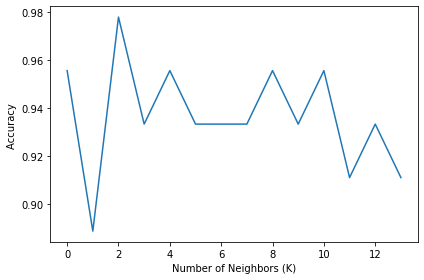

In [90]:
plt.plot(list_accuracy)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout() #Ajusta automáticamente los parámetros de la subtrama
plt.show()

# Radius Neighbors Classifier 

In [91]:
clasificador = RadiusNeighborsClassifier(4)
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)
yhat

array([1, 2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0])

In [92]:
print("Accuracy: ", accuracy_score(y_test, yhat))

Accuracy:  0.4666666666666667
